In [19]:
%pylab inline

import glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_one_opt/plot_together/'

Populating the interactive namespace from numpy and matplotlib


In [20]:
# PLot validation of each optimal allele in a period together

def main():
    
    means = [10**-5, 10**-4, 10**-3, 10**-2] #, 
    pers = [2,3,4]
    opt_dic = {}
    opt_dic[2] = [11,14,17,20]
    opt_dic[3] = [5,6,7,8]
    opt_dic[4] = [7,8,9,10]
    color_list = ['C0','C1','C2','C3']
    folder = 't22'
    fig_num = 0
    
    for per in pers:
        color_num = -1
        fig_num = fig_num + 1
        
        for opt in opt_dic[per]:
            color_num = color_num + 1
            list_of_s = []
            errors = []
            legend_labels = []

            for mean in means:
                
                for j in range(0,3):

                    file_list = glob.glob('./results/validation_multiple_one_opt/%s/per_%d_opt_%d_*_%.5f.txt'%(folder, per, opt, mean)) 
                    file_list.sort()
                       
                    filename = file_list[j]
                        
                    allele_freqs_file = open(filename, 'r')
                    lines = allele_freqs_file.readlines()

                    line = lines[4]       
                    info = line.strip().split(': ')
                    est_mean = float(info[1])
                    list_of_s.append(est_mean)
                    line = lines[5]       
                    info = line.strip().split(': ')
                    stdev = float(info[1])
                    line = lines[1]
                    info = line.strip().split(' ')
                    
                    k = float(info[7])
                    theta = float(info[10])
                    legend_labels.append('(%.1E,%.1E)'%(k,theta))
                    
                    errors.append(stdev)
                
            plt.figure(fig_num, figsize=(12, 6))
            
            y_pos = np.arange(len(legend_labels))

            plt.errorbar(y_pos[0:3], list_of_s[0:3], marker = 'o', ls = '--', c=color_list[color_num], label = '%d'%(opt)) 
            plt.errorbar(y_pos[3:6], list_of_s[3:6],  marker = 'o', ls = '--' , c=color_list[color_num]) 
            plt.errorbar(y_pos[6:9], list_of_s[6:9],  marker = 'o', ls = '--' , c=color_list[color_num]) 
            plt.errorbar(y_pos[9:12], list_of_s[9:12],  marker = 'o', ls = '--', c=color_list[color_num]) 
            plt.xticks(y_pos[0:12], legend_labels[0:12], rotation = 35) 
        plt.yscale('log')
        plt.ylabel("Estimated s")
        plt.axvline(x=2.5, linestyle = '--')
        plt.axvline(x=5.5, linestyle = '--')
        plt.axvline(x=8.5, linestyle = '--')
        plt.text(0.7,10**-7.3,r'$s=10^{-5}$')
        plt.text(3.7,10**-7.3,r'$s=10^{-4}$')
        plt.text(6.7,10**-7.3,r'$s=10^{-3}$')
        plt.text(9.7,10**-7.3,r'$s=10^{-2}$')
        plt.ylim(10**-6, 10**-1)
        plt.title('Joint method validation: Period %d\nMean of 30 median estimates'%(per))
        plt.legend()
        plt.savefig(PLOTDIR + '%s/per_%d.pdf'%(folder, per),bbox_inches='tight')
        plt.show()

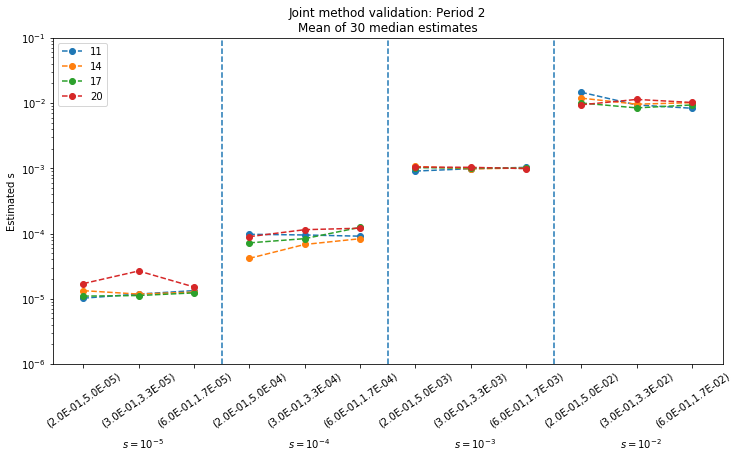

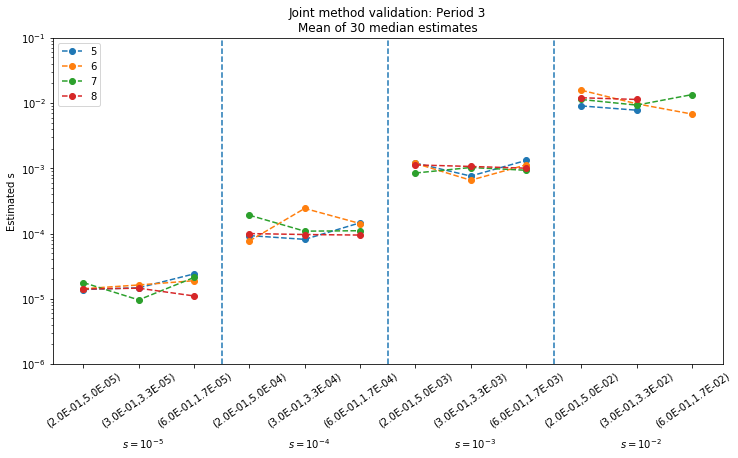

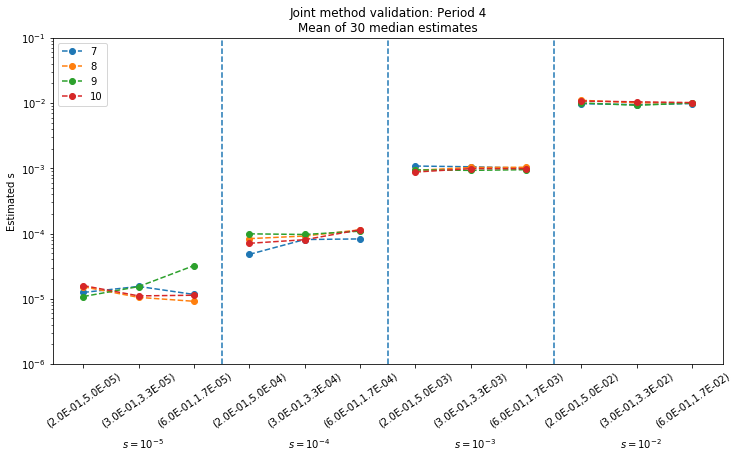

CPU times: user 4.98 s, sys: 76.9 ms, total: 5.06 s
Wall time: 5.08 s


In [21]:
%%time
if __name__ == '__main__':
    main()